In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df.csv")

In [3]:
all_match = df.drop("Participants",axis = 1).columns

In [4]:
def compute_winner(x):
    if(len(x)<4):
        if((int(x[0]) - int(x[2])) > 0):
            return "Domicile"
        elif((int(x[0]) - int(x[2])) == 0):
            return "Nul"
        else:
            return "Exterieur"
    else:
        return "Pas joué"

In [5]:
for match in all_match:
    r = match + " winner"
    df[r] = df[match].apply(lambda x : compute_winner(x))

In [6]:
df.columns

Index(['Participants', 'Suisse-Italie', 'All-Danemark', 'Angl-Slovak',
       'Esp-Georgie', 'France-Belgique', 'Portugal-Sloven',
       'Suisse-Italie winner', 'All-Danemark winner', 'Angl-Slovak winner',
       'Esp-Georgie winner', 'France-Belgique winner',
       'Portugal-Sloven winner'],
      dtype='object')

# Compute score

In [7]:
for match in all_match:
    b = match + " score_final"
    df[b] = "Pas joué"

In [8]:
df["Suisse-Italie score_final"] = "2-0"

In [9]:
for match in all_match:
    s = match + " points"
    a = match + " real winner"
    int_ = match + " basic"
    score = match + " score_final"
    df[a] = df[score].apply(lambda x : compute_winner(x))
    df[s] = np.where(df[match +" score_final"] == df[match], 3, 0)
    df[int_] = np.where(df[match+" winner"] == df[a], 1, 0)
    df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
    df[s] = df[s]+df[int_]
    df.drop(int_ , axis = 1, inplace = True)

In [10]:
score_columns = [col for col in df.columns if col.endswith('points')]
df['total_score'] = df[score_columns].sum(axis=1)

# Affichage

In [11]:
affichage = ['Participants', 'Suisse-Italie', 'All-Danemark', 'Angl-Slovak',
       'Esp-Georgie', 'France-Belgique', 'Portugal-Sloven', "total_score"]
df[affichage]

,Participants,Suisse-Italie,All-Danemark,Angl-Slovak,Esp-Georgie,France-Belgique,Portugal-Sloven,total_score
0,Coco,2-1,3-1,2-0,3-0,2-1,3-0,1
1,Coco,1-1,2-1,2-1,2-0,1-1,2-0,0
2,Coco,1-2,1-1,1-0,2-1,0-0,2-1,0
3,Lisa,0-1,2-0,1-1,2-0,1-0,1-0,0
4,Lisa,0-0,1-0,2-0,3-2,0-0,1-1,0
5,Lisa,1-1,2-1,1-0,1-0,2-1,2-0,0
6,JPierre,1-1,1-0,1-0,1-0,1-0,2-0,0
7,JPierre,0-0,2-0,2-1,2-1,2-0,2-1,0
8,JPierre,1-2,2-1,2-0,2-0,2-1,1-0,0
9,Guy,2-3,2-0,3-1,2-0,2-1,2-0,0


In [12]:
test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))

In [13]:
test

,total_score
Participants,
Cedric,3
Dom,3
Pascal,3
Albert,1
Brice,1
Coco,1
Gilles,1
Irwin,1
J Yves,1


In [14]:
df[affichage].sort_values("total_score", ascending = False)

,Participants,Suisse-Italie,All-Danemark,Angl-Slovak,Esp-Georgie,France-Belgique,Portugal-Sloven,total_score
45,Cedric,2-0,0-2,0-1,0-2,3-0,0-3,3
13,Dom,2-0,0-1,1-1,0-1,1-0,2-1,3
20,Pascal,2-0,0-0,0-0,2-1,2-0,0-1,3
17,Gilles,1-0,1-2,2-2,2-0,3-1,2-0,1
43,Brice,1-0,2-1,1-0,2-0,1-0,1-0,1
40,Kevin,2-1,3-0,2-2,2-0,3-1,2-2,1
37,J Yves,1-0,0-1,2-0,2-0,2-1,1-0,1
36,J Yves,2-1,1-0,2-1,3-0,1-0,2-0,1
35,Irwin,2-1,2-0,2-0,2-1,1-1,2-1,1
33,Irwin,1-0,2-1,1-0,2-0,1-0,2-0,1


In [19]:

aff = ['Participants', 'Belg - Roum', 'Georg - Tcheq', 'Turq- Port',
       'Ecos - Hongr', 'Suis - All', 'Croat - Ita', 'Alban - Esp',
       'Dan - Serb', 'Angl - Slo', 'Fra - Pol', 'Pays-B - Autri','Belg - Roum points', 'Georg - Tcheq points', 'Turq- Port points',
       'Ecos - Hongr points', 'Suis - All points', 'Croat - Ita points', 'Alban - Esp points',
       'Dan - Serb points', 'Angl - Slo points', 'Fra - Pol points', 'Pays-B - Autri points', "total_score"]

In [23]:
df[aff].sort_values("total_score", ascending = False).to_html('classement_table.html', index=False)

In [21]:
df[aff].sort_values("total_score", ascending = False)

,Participants,Belg - Roum,Georg - Tcheq,Turq- Port,Ecos - Hongr,Suis - All,Croat - Ita,Alban - Esp,Dan - Serb,Angl - Slo,...,Turq- Port points,Ecos - Hongr points,Suis - All points,Croat - Ita points,Alban - Esp points,Dan - Serb points,Angl - Slo points,Fra - Pol points,Pays-B - Autri points,total_score
38,Brice,1-1,1-1,0-1,0-2,1-3,1-0,0-3,0-0,0-0,...,1,1,0,0,1,3,3,3,0,15
25,Albert,2-0,0-1,2-3,0-1,0-0,1-1,0-2,3-1,1-1,...,1,3,1,3,1,0,1,0,1,14
40,Mathilde,2-0,1-1,0-1,1-1,2-3,1-1,2-2,2-2,2-1,...,1,0,0,3,0,1,0,1,0,12
16,Irwin,3-0,1-1,0-3,0-2,1-2,1-0,0-1,2-1,1-0,...,3,1,0,0,3,0,0,0,0,11
15,Irwin,2-0,0-1,0-2,0-1,0-2,1-1,0-2,2-0,2-0,...,1,3,0,3,1,0,0,0,0,11
33,Jeremy,1-0,0-1,1-2,0-2,1-1,1-1,1-3,2-1,2-1,...,1,1,3,3,1,0,0,0,0,10
29,Cyril,1-1,1-2,0-2,0-1,1-2,1-1,0-2,1-1,1-1,...,1,3,0,3,1,1,1,0,0,10
30,Kevin,1-0,0-0,1-2,1-2,0-1,1-1,0-1,2-0,1-0,...,1,1,0,3,3,0,0,0,0,10
34,Jeremy,3-1,1-1,0-2,1-2,0-2,1-2,0-1,1-1,2-0,...,1,1,0,0,3,1,0,0,0,10
28,Cyril,2-0,0-2,1-2,0-2,1-0,1-1,0-3,2-0,1-0,...,1,1,0,3,1,0,0,0,0,9


# Score en direct

In [15]:
test.reset_index(inplace = True)

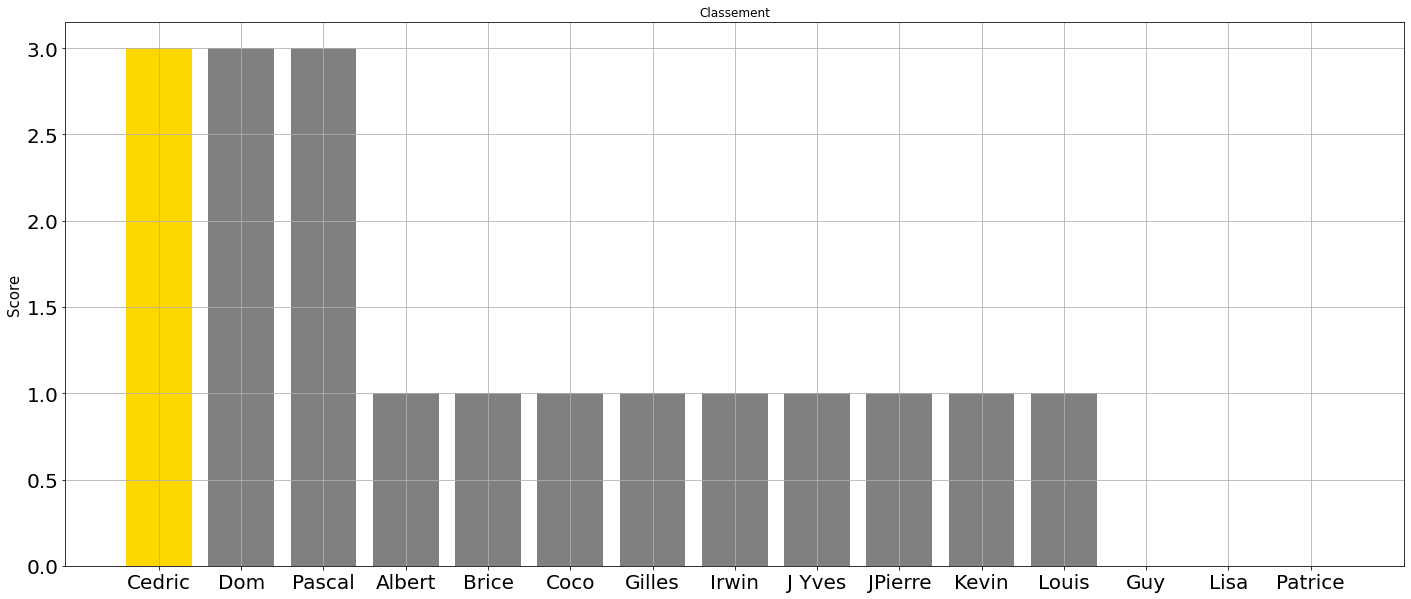

In [16]:
plt.figure(figsize=(24, 10))
plt.bar(test["Participants"],test["total_score"], color=['gold', 'grey', 'grey', "grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey"])

plt.ylabel('Score',fontsize=15)
plt.title('Classement')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.savefig('classement.png')
plt.show()

plt.close()

# Live

In [17]:
"""
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
import time
import subprocess
from IPython.display import clear_output
from selenium.webdriver.chrome.options import Options
while True:
    # Your code here
    print("This cell will re-run every 4 minutes")
    clear_output(wait=True)
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode
    chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems

    driver = webdriver.Chrome(options=chrome_options)
    driver.get("https://www.livescore.in/fr/match/zT9cab4L/#/resume-du-match/resume-du-match")
    try:
        container = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID,"detail"))
        )
        domicile = container.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
        print(domicile.text)
        exterieur = container.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
        print(exterieur.text)
        home_team = container.find_element(By.CSS_SELECTOR,"#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
        print(home_team.text)
        ext_team = container.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
        print(ext_team.text)
        live_score_text = f"Live score: {home_team.text} {domicile.text} - {exterieur.text} {ext_team.text}"
        print(live_score_text)

        with open('live_score.html', 'w') as f:
            f.write(f"<p>{live_score_text}</p>")
        df['Belg - Roum score_final'] = str(domicile.text) + "-" + str(exterieur.text)
        s = "Belg - Roum points"
        a = "Belg - Roum real winner"
        int_ = "Belg - Roum basic"
        score = "Belg - Roum score_final"
        df[a] = df[score].apply(lambda x : compute_winner(x))
        df[s] = np.where(df["Belg - Roum score_final"] == df['Belg - Roum'], 3, 0)
        df[int_] = np.where(df["Belg - Roum winner"] == df[a], 1, 0)
        df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
        df[s] = df[s]+df[int_]
        df.drop(int_ , axis = 1, inplace = True)
        score_columns = [col for col in df.columns if col.endswith('points')]
        df['total_score'] = df[score_columns].sum(axis=1)
        test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))
        test.reset_index(inplace = True)
        affichage_2 = df[affichage].sort_values("total_score", ascending=False)
        affichage_2.to_html('classement_table.html', index=False)
        plt.figure(figsize=(18, 10))
        plt.bar(test["Participants"],test["total_score"], color=['gold', 'silver', 'brown', "grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey"])

        plt.ylabel('Score',fontsize=15)
        plt.title('Classement')
        plt.xticks(fontsize = 20, rotation = 45)
        plt.yticks(fontsize = 20)
        plt.grid(True)
        plt.savefig('classement.png')
        plt.show()
        plt.close


        status_output = subprocess.run(['git', 'status', '--porcelain'], capture_output=True, text=True).stdout.strip()

        if status_output:
            subprocess.run(['git', 'add', 'classement.png', 'index.html', 'classement_table.html',"test2.ipynb", "index.html","live_score.html"], check=True)
            subprocess.run(['git', 'commit', '-m', 'Update classement plot'], check=True)
            subprocess.run(['git', 'push'], check=True)
    finally:
        driver.quit()
    # Sleep for 4 minutes (4 minutes * 60 seconds)
    time.sleep(4 * 60)
""";    

# Live deux matchs en meme temps

In [18]:
"""
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
import time
import subprocess
from IPython.display import clear_output
from selenium.webdriver.chrome.options import Options
while True:
    # Your code here
    print("This cell will re-run every 4 minutes")
    clear_output(wait=True)
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode
    chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems



    #match 1
    driver1 = webdriver.Chrome(options=chrome_options)
    driver1.get("https://www.livescore.in/fr/match/z9sCm159/#/resume-du-match/resume-du-match")
    #match 2
    driver2 = webdriver.Chrome(options=chrome_options)
    driver2.get("https://www.livescore.in/fr/match/hph7lsj3/#/resume-du-match/resume-du-match")
    try:
        #match 1
        container1 = WebDriverWait(driver1, 10).until(
            EC.presence_of_element_located((By.ID,"detail"))
        )
        domicile1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
        print(domicile1.text)
        exterieur1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
        print(exterieur1.text)
        home_team1 = container1.find_element(By.CSS_SELECTOR,"#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
        print(home_team1.text)
        ext_team1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
        print(ext_team1.text)

        #match 2
        container2 = WebDriverWait(driver2, 10).until(
            EC.presence_of_element_located((By.ID,"detail"))
        )
        domicile2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
        print(domicile2.text)
        exterieur2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
        print(exterieur2.text)
        home_team2 = container2.find_element(By.CSS_SELECTOR,"#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
        print(home_team2.text)
        ext_team2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
        print(ext_team2.text)

        #text
        live_score_text = f"Live score: {home_team1.text} {domicile1.text} - {exterieur1.text} {ext_team1.text} , {home_team2.text} {domicile2.text} - {exterieur2.text} {ext_team2.text}"
        print(live_score_text)

        with open('live_score.html', 'w') as f:
            f.write(f"<p>{live_score_text}</p>")

        #match1
        df['Croat - Ita score_final'] = str(domicile1.text) + "-" + str(exterieur1.text)
        s = "Croat - Ita points"
        a = "Croat - Ita real winner"
        int_ = "Croat - Ita basic"
        score = "Croat - Ita score_final"
        df[a] = df[score].apply(lambda x : compute_winner(x))
        df[s] = np.where(df["Croat - Ita score_final"] == df['Croat - Ita'], 3, 0)
        df[int_] = np.where(df["Croat - Ita winner"] == df[a], 1, 0)
        df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
        df[s] = df[s]+df[int_]
        df.drop(int_ , axis = 1, inplace = True)
        
        #match2
        df['Alban - Esp score_final'] = str(domicile2.text) + "-" + str(exterieur2.text)
        s = "Alban - Esp points"
        a = "Alban - Esp real winner"
        int_ = "Alban - Esp basic"
        score = "Alban - Esp score_final"
        df[a] = df[score].apply(lambda x : compute_winner(x))
        df[s] = np.where(df["Alban - Esp score_final"] == df['Alban - Esp'], 3, 0)
        df[int_] = np.where(df["Alban - Esp winner"] == df[a], 1, 0)
        df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
        df[s] = df[s]+df[int_]
        df.drop(int_ , axis = 1, inplace = True)

        
        #score
        score_columns = [col for col in df.columns if col.endswith('points')]
        df['total_score'] = df[score_columns].sum(axis=1)
        test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))
        test.reset_index(inplace = True)
        affichage_2 = df[affichage].sort_values("total_score", ascending=False)
        affichage_2.to_html('classement_table.html', index=False)
        plt.figure(figsize=(18, 10))
        plt.bar(test["Participants"],test["total_score"], color=['gold', 'silver', 'brown', "grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey"])

        plt.ylabel('Score',fontsize=15)
        plt.title('Classement')
        plt.xticks(fontsize = 20, rotation = 45)
        plt.yticks(fontsize = 20)
        plt.grid(True)
        plt.savefig('classement.png')
        plt.show()
        plt.close


        status_output = subprocess.run(['git', 'status', '--porcelain'], capture_output=True, text=True).stdout.strip()

        if status_output:
            subprocess.run(['git', 'add', 'classement.png', 'index.html', 'classement_table.html',"test2.ipynb", "index.html","live_score.html"], check=True)
            subprocess.run(['git', 'commit', '-m', 'Update classement plot'], check=True)
            subprocess.run(['git', 'push'], check=True)
    finally:
        driver1.quit()
        #driver2.quit()
    # Sleep for 4 minutes (4 minutes * 60 seconds)
    time.sleep(4 * 60)
""";

1
0
Allemagne
Danemark
Live score: Allemagne 1 - 0 Danemark , 


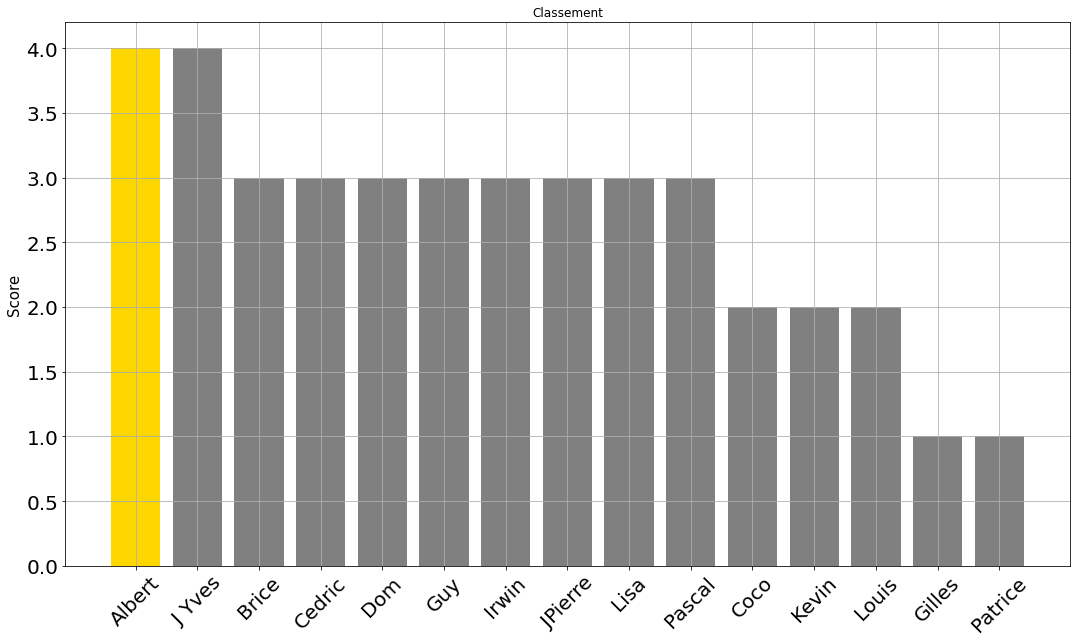

In [14]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
import time
import subprocess
from IPython.display import clear_output
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


while True:
    # Your code here
    print("This cell will re-run every 4 minutes")
    clear_output(wait=True)
    
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode
    chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems

    # Match 1
    driver1 = webdriver.Chrome(options=chrome_options)
    driver1.get("https://www.livescore.in/fr/match/UmziYSZ0/#/resume-du-match/resume-du-match")

    # Match 2
    #driver2 = webdriver.Chrome(options=chrome_options)
    #driver2.get("https://www.livescore.in/fr/match/zXPbvcSe/#/resume-du-match/resume-du-match")

    try:
        # Initialize variables
        home_team1, domicile1, exterieur1, ext_team1 = None, None, None, None
        #home_team2, domicile2, exterieur2, ext_team2 = None, None, None, None

        # Match 1
        try:
            container1 = WebDriverWait(driver1, 10).until(
                EC.presence_of_element_located((By.ID, "detail"))
            )
            domicile1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
            exterieur1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
            home_team1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            ext_team1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            
            print(domicile1.text)
            print(exterieur1.text)
            print(home_team1.text)
            print(ext_team1.text)
        except (NoSuchElementException, TimeoutException):
            print("Match 1 details not available.")
        """
        # Match 2
        try:
            container2 = WebDriverWait(driver2, 10).until(
                EC.presence_of_element_located((By.ID, "detail"))
            )
            domicile2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
            exterieur2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
            home_team2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            ext_team2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            
            print(domicile2.text)
            print(exterieur2.text)
            print(home_team2.text)
            print(ext_team2.text)
        except (NoSuchElementException, TimeoutException):
            print("Match 2 details not available.")"""

        # Text
        live_score_text = (
            f"Live score: {home_team1.text if home_team1 else 'N/A'} {domicile1.text if domicile1 else 'N/A'} - "
            f"{exterieur1.text if exterieur1 else 'N/A'} {ext_team1.text if ext_team1 else 'N/A'} , "
            #f"{home_team2.text if home_team2 else 'N/A'} {domicile2.text if domicile2 else 'N/A'} - "
            #f"{exterieur2.text if exterieur2 else 'N/A'} {ext_team2.text if ext_team2 else 'N/A'}"
        )
        print(live_score_text)

        with open('live_score.html', 'w') as f:
            f.write(f"<p>{live_score_text}</p>")

        # Match 1 DataFrame update
        if domicile1 and exterieur1:
            df['All-Danemark score_final'] = str(domicile1.text) + "-" + str(exterieur1.text)
            s = "All-Danemark points"
            a = "All-Danemark real winner"
            int_ = "All-Danemark basic"
            score = "All-Danemark score_final"
            df[a] = df[score].apply(lambda x: compute_winner(x))
            df[s] = np.where(df["All-Danemark score_final"] == df['All-Danemark'], 3, 0)
            df[int_] = np.where(df["All-Danemark winner"] == df[a], 1, 0)
            df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
            df[s] = df[s] + df[int_]
            df.drop(int_, axis=1, inplace=True)
        """
        # Match 2 DataFrame update
        if domicile2 and exterieur2:
            df['Dan - Serb score_final'] = str(domicile2.text) + "-" + str(exterieur2.text)
            s = "Dan - Serb points"
            a = "Dan - Serb real winner"
            int_ = "Dan - Serb basic"
            score = "Dan - Serb score_final"
            df[a] = df[score].apply(lambda x: compute_winner(x))
            df[s] = np.where(df["Dan - Serb score_final"] == df['Dan - Serb'], 3, 0)
            df[int_] = np.where(df["Dan - Serb winner"] == df[a], 1, 0)
            df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
            df[s] = df[s] + df[int_]
            df.drop(int_, axis=1, inplace=True)
        """
        # Score
        score_columns = [col for col in df.columns if col.endswith('points')]
        df['total_score'] = df[score_columns].sum(axis=1)
        test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))
        test.reset_index(inplace=True)
        affichage_2 = df[affichage].sort_values("total_score", ascending=False)
        affichage_2.to_html('classement_table.html', index=False)
        
        plt.figure(figsize=(18, 10))
        plt.bar(test["Participants"], test["total_score"], color=['gold', "grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey"] * 11)
        plt.ylabel('Score', fontsize=15)
        plt.title('Classement')
        plt.xticks(fontsize=20, rotation=45)
        plt.yticks(fontsize=20)
        plt.grid(True)
        plt.savefig('classement.png')
        plt.show()
        plt.close()

        status_output = subprocess.run(['git', 'status', '--porcelain'], capture_output=True, text=True).stdout.strip()

        if status_output:
            subprocess.run(['git', 'add', 'classement.png', 'index.html', 'classement_table.html', "test2.ipynb", "index.html", "live_score.html"], check=True)
            subprocess.run(['git', 'commit', '-m', 'Update classement plot'], check=True)
            subprocess.run(['git', 'push'], check=True)
    finally:
        driver1.quit()
        #driver2.quit()
    
    # Sleep for 4 minutes (4 minutes * 60 seconds)
    time.sleep(4 * 60)
